### Q1. Business Case: Netflix - Data Exploration and Visualisation
### Submitted by Vinay Kumar - vinay.bhatt@gmail.com

## 01-Problem Statement:

Netflix dataset consists of content added to Netflix for the past several years. It also has the maturity ratings, release year and the date when the content was uploaded to Netflix. It also has information on the title, country of release, director and cast for the content uploaded.

Based on analysis of the given data we need to provide: 
1- Business insights - What type of content on the platform has been liked by customers in the past 
2- Data backed recommendations - based on past data which might help to enable attract more customers

## Analysing basic metrices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('netflix.csv')
df = netflix.copy()

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Number of Rows = 8807
#### Number of Columns = 12

In [5]:
#rows which have one of more values as Nan
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### We can see that some values are missing for the following columns - 
    director
    cast
    country
    date_added
    rating
    duration

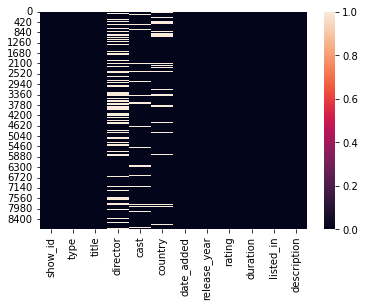

In [6]:
sns.heatmap(df.isna())
plt.show()

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###This does not give any significant information which can be used. The only numeric column is release_year

### Date Cleanup
#### director, cast and country cannot be filled
#### date_added, rating and duration will check what the values are and if it is possible to fill these
####  date_added - 10 values missing,   rating - 4 values missing, duration - 3 values missing

In [8]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


#### date_added is missing for the above 10 values
#### Populating them same as the 1st of January of the release year 

In [9]:
temp_idx = df[df['date_added'].isna()]['date_added'].index
temp_values = df[df['date_added'].isna()]['release_year']
temp_values = temp_values.apply(lambda x:'January 01, '+str(x))

print(temp_idx)
print(temp_values)

Int64Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')
6066    January 01, 2013
6174    January 01, 2018
6795    January 01, 2003
6806    January 01, 2003
6901    January 01, 2008
7196    January 01, 2010
7254    January 01, 2012
7406    January 01, 2016
7847    January 01, 2015
8182    January 01, 2015
Name: release_year, dtype: object


In [10]:
df.loc[temp_idx,['date_added']] = temp_values #updating the missing values of date_added with temp_values

In [11]:
df.loc[temp_idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 01, 2013",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,"January 01, 2018",2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"January 01, 2003",2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"January 01, 2003",2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"January 01, 2008",2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,"January 01, 2010",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,"January 01, 2012",2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 01, 2016",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 01, 2015",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,"January 01, 2015",2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### 4 ratings are not available 
#### We will update the values to 'UR' which means unrated

In [13]:
temp_idx = df[df['rating'].isna()]['rating'].index
df.loc[temp_idx,['rating']] = 'UR'
df.loc[temp_idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,UR,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,UR,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,UR,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,UR,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### We can see that the duration for these 3 rows is incorrectly populated in rating column
#### we will move the values from rating to duration column
#### The blank rating column after the movement will be filled with 'UR' - unrated

In [15]:
temp_idx = df[df['duration'].isna()]['duration'].index
temp_values = df[df['duration'].isna()]['rating'].values
df.loc[temp_idx,['duration']] = temp_values
df.loc[temp_idx,['rating']] = 'UR'
df.loc[temp_idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,UR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,UR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,UR,66 min,Movies,The comic puts his trademark hilarious/thought...


In [16]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

#### Now the data looks to be cleaned to the extent possible. 
#### NaN values in director, cast and country will be populated as director_unknown, cast_unknown and country_unknown 

In [17]:
df['director'].fillna('director_unknown', inplace=True)
df['cast'].fillna('cast_unknown', inplace=True)
df['country'].fillna('country_unknown', inplace=True)

In [18]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### We can see that now all the missing values have been fixed

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### We will convert 'date_added' to date time format and also split it to get the year, month, day and weekday name

In [20]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['day_of_week'] = df['date_added'].dt.day_name()
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,day_of_week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,director_unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday


#### The columns for year_added, month_added, day_added and day_of_week are added to the dataframe

In [21]:
df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1719
release_year      74
rating            14
duration         220
listed_in        514
description     8775
year_added        15
month_added       12
day_added         31
day_of_week        7
dtype: int64

#### We can see that the type has 2 categories

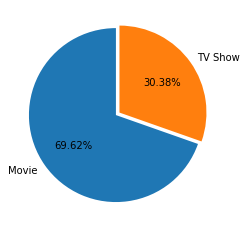

In [22]:
plt.figure(figsize=(4,4))
plt.pie(df['type'].value_counts(), labels = df['type'].unique(), explode=[0,0.05], startangle=90, autopct='%1.2f%%')
plt.show()

#### #1- There are only 2 content types - Movies and TV shows 
#### #2- Number of movies is more than 2 times the TV shows

In [23]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'UR', 'NR', 'TV-Y7-FV'], dtype=object)

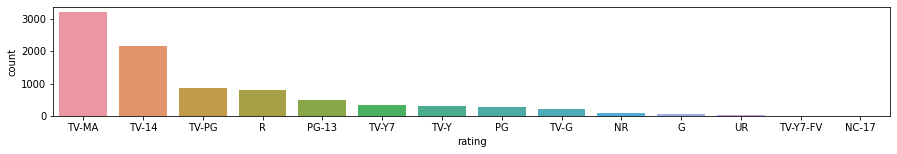

In [24]:
plt.figure(figsize=(15,2))
sns.countplot(data=df, x = 'rating', order = df['rating'].value_counts().index)
plt.show()

#### #1- TV-MA has highest count which means availability of mature/adult content is more on netflix
#### #2- TV-14 has second highest count which means content for teenage group and above.
#### #3- Next highest content for TV-PG, PG-13 and PG indicates content under parental guidance which is for teenage groups
#### #4- TV-Y, TV-Y7 bars indicate that content for kids is comparatively lower

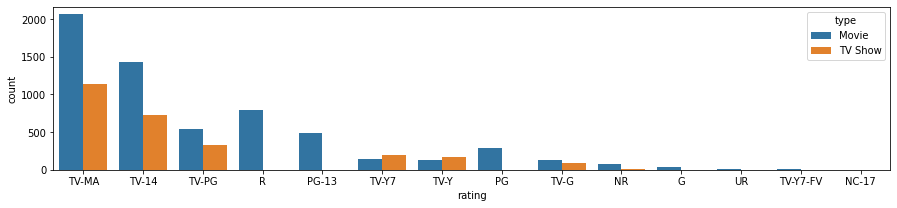

In [25]:
plt.figure(figsize=(15,3))
sns.countplot(data=df, x = 'rating', hue = 'type', order = df['rating'].value_counts().index)
plt.show()

#### #1- For Mature rating and Teenage group content the movie content is more compared to TV shows
#### #2- for Kids content the TV shows are slightly more compared to movies

In [26]:
df_tv = df[df['type']=='TV Show']
df_movies = df[df['type']=='Movie']
df_tv['country'].value_counts()

United States                                    760
country_unknown                                  391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

#### From the above list it looks like the 'country' column has some entries with multiple countries occuring
#### Apart from this the 'cast' and the 'listed_in' columns also has multiple entries which are comma seperated
#### We will convert these comma separated values into lists and explode the dataframe further for more analysis

In [27]:
df1 = df.copy()   #copying df to df1 before explode operation
df1.shape #Note that before the explode operation the number of rows is 8807

(8807, 16)

In [28]:
df1['country'] = df1['country'].str.split(', ') #change country into list. if you dont give space after comma countries are appearing twice
df1_exp_country = df1.explode('country')

In [29]:
df1_exp_country['country'].value_counts()

United States      3689
India              1046
country_unknown     831
United Kingdom      804
Canada              445
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: country, Length: 128, dtype: int64

In [30]:
df1_exp_country = pd.DataFrame(df1_exp_country['country'].value_counts())
df1_exp_country.reset_index(inplace=True)

In [31]:
df1_exp_country.columns = ['country','counts']
df1_exp_country[0:15]

,country,counts
0,United States,3689
1,India,1046
2,country_unknown,831
3,United Kingdom,804
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,South Korea,231
9,Germany,226


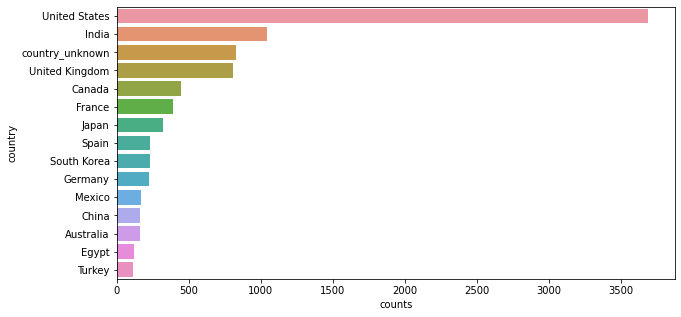

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1_exp_country[0:15], y='country',x='counts')
plt.show()

### United States is the largest content producer followed by India and United Kingdom

In [33]:
df2 = df.copy()   #copying df to df2 before explode operation
df2.shape #Note that before the explode operation the number of rows is 8807

(8807, 16)

In [34]:
df2['listed_in'] = df2['listed_in'].str.split(', ')  #change listed_in into list
df2_exp_listed = df2.explode('listed_in')

In [35]:
df2_exp_listed['listed_in'].value_counts().head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

In [36]:
df2_exp_listed = pd.DataFrame(df2_exp_listed['listed_in'].value_counts())
df2_exp_listed.reset_index(inplace=True)

In [37]:
df2_exp_listed.columns = ['genre','counts']
df2_exp_listed[0:15]

,genre,counts
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


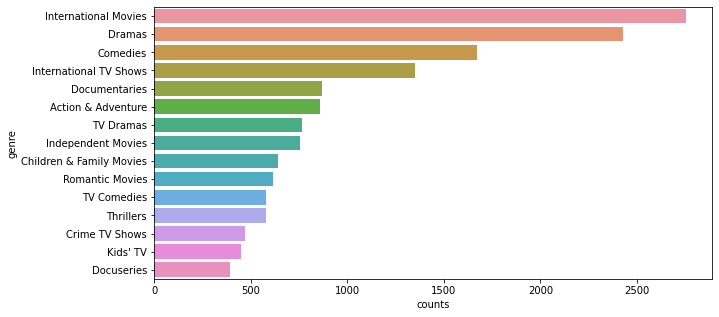

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2_exp_listed[0:15], y='genre',x='counts')
plt.show()

### International movies is most popular followed by dramas and comedies

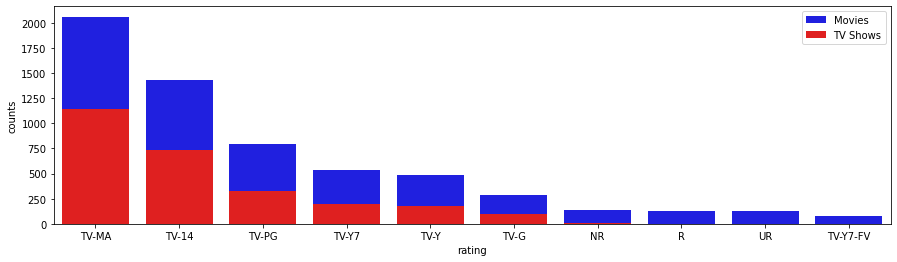

In [39]:
plt.figure(figsize=(15,4))
count_movies = pd.DataFrame(df[df['type']=='Movie']['rating'].value_counts()).reset_index()
count_movies.columns = ['rating','counts']
count_movies
sns.barplot(data=count_movies,x='rating',y='counts', color='b', label='Movies')
count_tv_shows = pd.DataFrame(df[df['type']=='TV Show']['rating'].value_counts()).reset_index()
count_tv_shows.columns = ['rating','counts']
count_tv_shows
sns.barplot(data=count_tv_shows,x='rating',y='counts', color='r', label='TV Shows')
plt.legend()
plt.show()

### Most of the content is with rating TV-MA (Mature content) only followed by TV-14 and TV-PG

In [40]:
df3 = df.copy()
df3['cast'] = df3['cast'].str.split(', ')  #change listed_in into list
df3.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,day_of_week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[cast_unknown],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,director_unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday


In [41]:
df3_exp_cast = df3.explode('cast')
print(df3_exp_cast.shape)
df3_exp_cast.head(2)

(64951, 16)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,day_of_week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast_unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,director_unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday


In [42]:
df3_exp_cast['cast'].value_counts().head(15)

cast_unknown        825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Vincent Tong         26
Rajesh Kava          26
Name: cast, dtype: int64

In [43]:
df3_exp_cast = pd.DataFrame(df3_exp_cast['cast'].value_counts())
df3_exp_cast.reset_index(inplace=True)

In [44]:
df3_exp_cast.columns = ['cast','counts']
df3_exp_cast[0:15]

,cast,counts
0,cast_unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


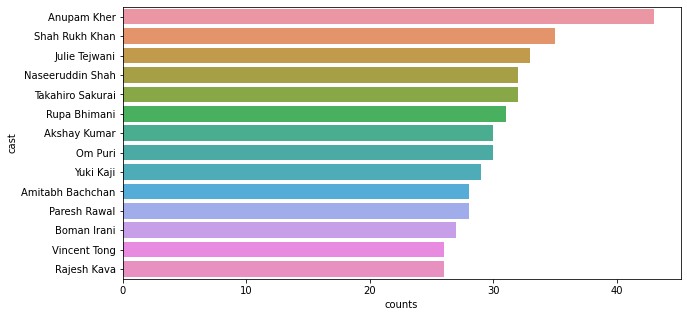

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=df3_exp_cast[1:15], y='cast',x='counts')
plt.show()

### Mostly Indian names in popular casts with 11 names in top 15
#### Anupam Kher > Shahrukh Khan > Julie Tejwani are the top3 casts across content on Netflix

In [46]:
df3_exp_director = pd.DataFrame(df3['director'].value_counts())
df3_exp_director.reset_index(inplace=True)

In [47]:
df3_exp_director.columns = ['director','counts']
df3_exp_director[0:15]

,director,counts
0,director_unknown,2634
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12


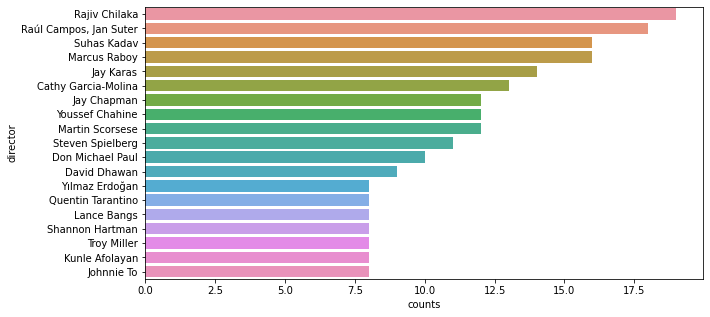

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=df3_exp_director[1:20], y='director',x='counts')
plt.show()

####  Rajiv Chilaka is the most popular director followed by Raul Campos, Jan Suter as a team and then is Suhas Kadav

In [49]:
D = df['year_added'].value_counts().head(15)
tot_cont_by_year = pd.DataFrame(D)
tot_cont_by_year.reset_index(inplace=True)
tot_cont_by_year.columns = ['year','total_counts']
tot_cont_by_year

,year,total_counts
0,2019,2016
1,2020,1879
2,2018,1650
3,2021,1498
4,2017,1188
5,2016,430
6,2015,84
7,2014,24
8,2011,13
9,2013,12


In [50]:
D = df[df['type']=='Movie']['year_added'].value_counts().head(15)
tot_movies_by_year = pd.DataFrame(D)
tot_movies_by_year.reset_index(inplace=True)
tot_movies_by_year.columns = ['year','movie_counts']
tot_movies_by_year

,year,movie_counts
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,839
5,2016,253
6,2015,56
7,2014,19
8,2011,13
9,2013,6


In [51]:
D = df[df['type']=='TV Show']['year_added'].value_counts().head(15)
tot_tvshows_by_year = pd.DataFrame(D)
tot_tvshows_by_year.reset_index(inplace=True)
tot_tvshows_by_year.columns = ['year','tvshow_counts']
tot_tvshows_by_year

,year,tvshow_counts
0,2020,595
1,2019,592
2,2021,505
3,2018,413
4,2017,349
5,2016,177
6,2015,28
7,2013,6
8,2014,5
9,2008,2


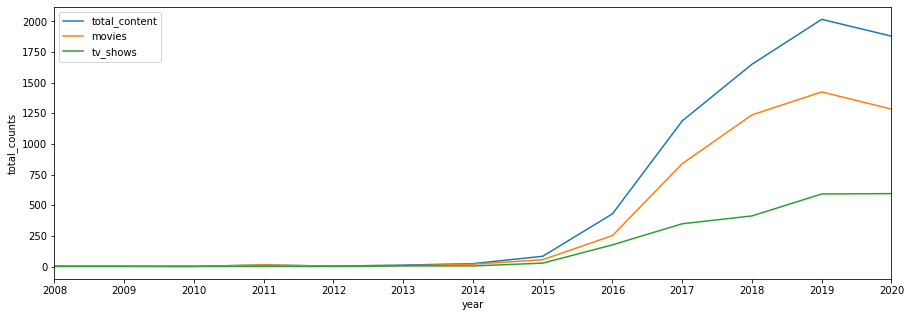

In [52]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=tot_cont_by_year, x= 'year', y= 'total_counts', label='total_content')
sns.lineplot(data=tot_movies_by_year, x= 'year', y= 'movie_counts', label='movies')
sns.lineplot(data=tot_tvshows_by_year, x= 'year', y= 'tvshow_counts', label='tv_shows')
plt.xlim(2008,2020)
ax.set_xticks(np.arange(2008, 2021, 1))
plt.legend()
plt.show()

#### Very less content has been added until 2014 and has picked thereafter. 
#### Slight decrease has been seen in content addition for year 2019-2020

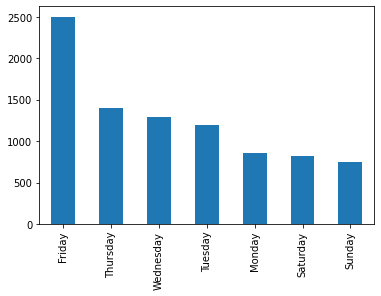

In [53]:
df['day_of_week'].value_counts().plot(kind='bar')
plt.show()

#### Addition of content increases as the week progresses
#### On Fridays maximum content is addede  followed by Thursday and Wednesday

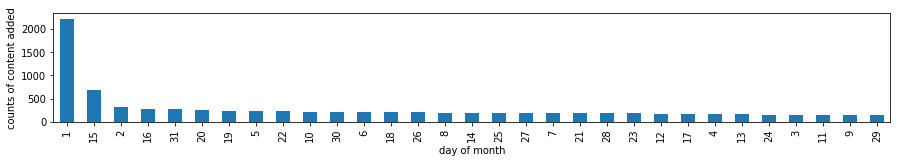

In [54]:
plt.figure(figsize=(15,2))
df['day_added'].value_counts().plot(kind='bar', xlabel = 'day of month', ylabel ='counts of content added')
plt.show()

#### Most of the content has been added on 1st followed by 15th and then 2nd of month

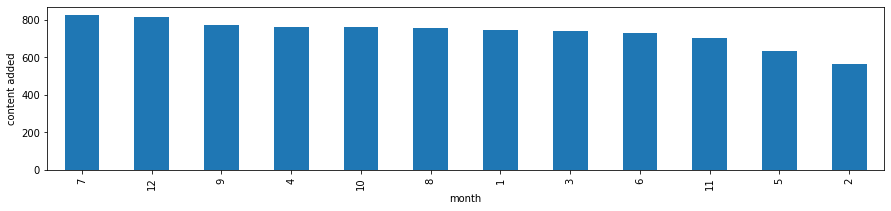

In [55]:
plt.figure(figsize=(15,3))
df['month_added'].value_counts().plot(kind='bar', xlabel = 'month', ylabel = 'content added')
plt.show()

#### Slightly more content has been added in the months of July and December but it is not significant to give clear insights

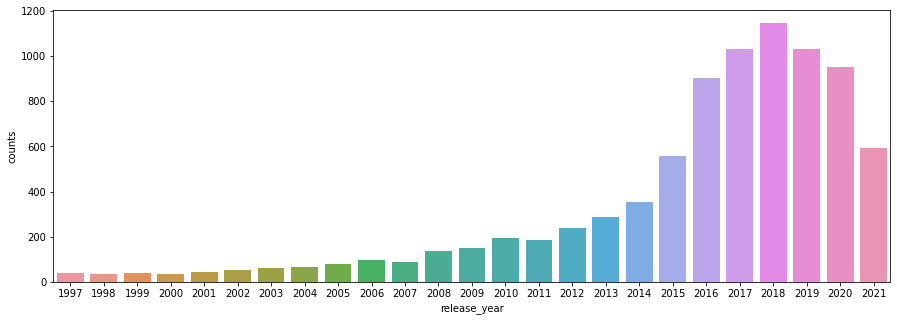

In [56]:
df['release_year'].value_counts()
df_rel_year = pd.DataFrame(df['release_year'].value_counts())
df_rel_year.reset_index(inplace=True)
df_rel_year.columns = ['release_year','counts']
plt.figure(figsize=(15,5))
sns.barplot(data=df_rel_year[0:25], x='release_year',y='counts',)
plt.show()

### - Very less old content has been added to netflix content release before 2008 is very little

### Final Recommendations

#### Old content is not added to netflix. More content can be added which has been released before year 2014
#### Kid and teenager content is less compared to mature content. To add viewership more Kid specific content can be added
#### Recommended to capture data which can provide information on how much the content was popular and rated by the viewers